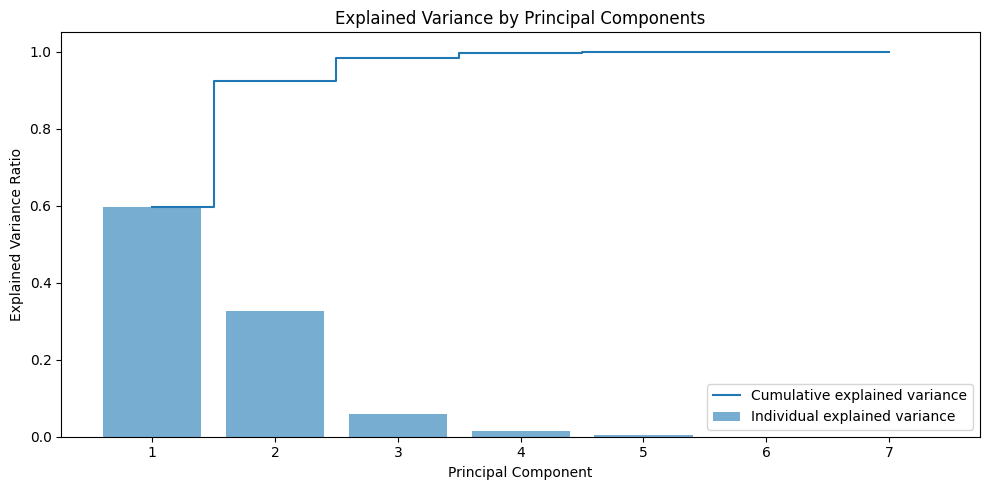

Explained Variance Ratio: [5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]
Cumulative Explained Variance: [0.59596884 0.92317704 0.98240023 0.99599655 0.99995041 0.99999864
 1.        ]


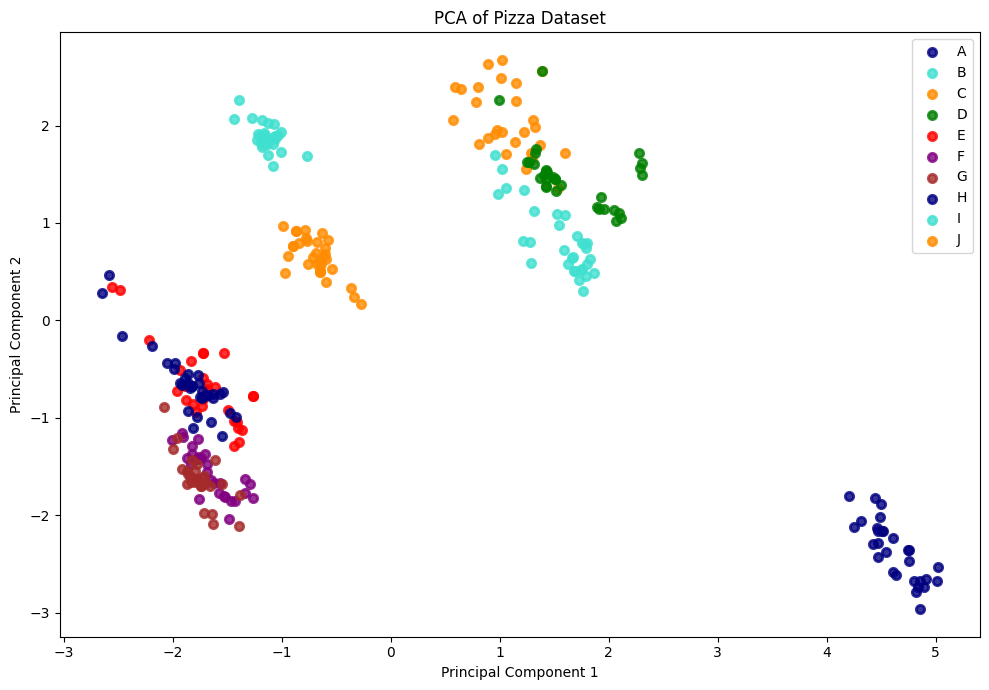

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load your Pizza dataset
df = pd.read_csv("Pizza.csv")  # Replace with actual path if needed

# Step 2: Prepare features and labels
X = df.drop(['id', 'brand'], axis=1).values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['brand'])  # Encode brand labels (e.g., A, B, C)
target_names = label_encoder.classes_

# Step 3: Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 4: Apply PCA (all components to check variance)
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Step 5: Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Step 6: Plot explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio,
        alpha=0.6, label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance,
         where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Step 7: Print explained variance
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Step 8: Reduce to 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_standardized)

# Step 9: Visualize PCA-transformed data in 2D
plt.figure(figsize=(10, 7))
colors = ['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple', 'brown']
lw = 2

for i, target_name in enumerate(target_names):
    plt.scatter(X_pca_2[y == i, 0], X_pca_2[y == i, 1],
                alpha=0.8, color=colors[i % len(colors)],
                lw=lw, label=target_name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pizza Dataset')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

: 